# Preprocessing the Data

In [264]:
# Initial imports
import pandas as pd
from pathlib import Path
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
%matplotlib inline
import numpy as np


In [265]:
# Loading data
file_path = Path("Resources/combined_data.csv")
combined_df = pd.read_csv(file_path, index_col='Year')
combined_df.head()

,Quarter,Fraud Reporting Count,Net Operating Income(Billions),Lagged Fraud Reporting Count,Lagged Net Operating Income(Billions)
Year,,,,,
2014,1,82364,36.8,NaN,NaN
2014,2,95516,39.8,82364.0,36.8
2014,3,94084,38.1,95516.0,39.8
2014,4,90868,36.0,94084.0,38.1
2015,1,90566,39.0,90868.0,36.0


In [266]:
combined_df.dropna(inplace=True)
combined_df

,Quarter,Fraud Reporting Count,Net Operating Income(Billions),Lagged Fraud Reporting Count,Lagged Net Operating Income(Billions)
Year,,,,,
2014,2,95516,39.8,82364.0,36.8
2014,3,94084,38.1,95516.0,39.8
2014,4,90868,36.0,94084.0,38.1
2015,1,90566,39.0,90868.0,36.0
2015,2,96365,42.6,90566.0,39.0
2015,3,101745,40.0,96365.0,42.6
2015,4,105491,40.1,101745.0,40.0
2016,1,108801,38.4,105491.0,40.1
2016,2,128668,42.9,108801.0,38.4


In [267]:
# slice features and target
x = combined_df.drop(columns=['Fraud Reporting Count', 'Quarter','Lagged Net Operating Income(Billions)'])
y = combined_df[["Fraud Reporting Count"]]
display(x.head())
display(y.head())

,Net Operating Income(Billions),Lagged Fraud Reporting Count
Year,,
2014,39.8,82364.0
2014,38.1,95516.0
2014,36.0,94084.0
2015,39.0,90868.0
2015,42.6,90566.0


,Fraud Reporting Count
Year,
2014,95516
2014,94084
2014,90868
2015,90566
2015,96365


In [268]:
#Slicing data into train and test subsets
x_train, x_test, y_train, y_test = train_test_split(x,y,shuffle=False ,random_state=1)
x_train.shape

(23, 2)

In [269]:
#Scaling data
scaler = StandardScaler()
x_scaler = scaler.fit(x_train)
x_train_scaled = x_scaler.transform(x_train)
x_test_scaled = x_scaler.transform(x_test)



In [270]:
y_train.shape

(23, 1)

In [271]:
y_test.shape

(8, 1)

In [272]:
#Scaling y data
y_scaler = StandardScaler().fit(y_train)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

# Fitting the Random Forest Model

In [273]:
# Create a random forest classifier
rf_model = RandomForestRegressor(n_estimators=500, random_state=78)


In [274]:
# Fitting the model
rf_model = rf_model.fit(x_train_scaled, y_train_scaled.ravel())

In [275]:
rf_model.feature_importances_

array([0.21728314, 0.78271686])

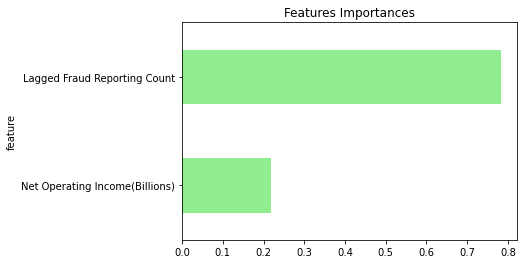

In [276]:
fig = pd.DataFrame(
    {
        "Gini":rf_model.feature_importances_,
        "feature":x.columns
    }
).sort_values(by="Gini", ascending=True).iloc[0:10].plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False, x="feature").get_figure()
fig.savefig('Resources/Images/RandomForestFeatureImportances.png',format='png')

## Making Predictions Using the Random Forest Model

In [277]:
# Making predictions using the testing data
predictions = rf_model.predict(x_train_scaled)
predicted = np.concatenate((predictions, rf_model.predict(x_test_scaled)))
predicted


array([-1.1005126 , -1.09276358, -1.18118148, -1.19194113, -1.03869659,
       -0.96821577, -0.77742607, -0.57660056, -0.23530317, -0.13221106,
       -0.28951989, -0.30027277, -0.21799835, -0.13177282, -0.23721692,
        0.1993627 ,  0.39938129,  0.70476109,  1.29410398,  1.70050333,
        1.4186701 ,  1.64487887,  1.59790616,  1.2548956 ,  1.2548956 ,
        1.39010386,  1.6307734 ,  1.37691538,  1.37691538,  1.37691538,
        1.37691538])

In [278]:
predicted_output = y_scaler.inverse_transform(predicted.reshape(-1, 1))
predicted_output

array([[ 95316.51 ],
       [ 95550.234],
       [ 92883.394],
       [ 92558.864],
       [ 97180.99 ],
       [ 99306.816],
       [105061.37 ],
       [111118.622],
       [121412.754],
       [124522.194],
       [119777.482],
       [119453.156],
       [121934.698],
       [124535.412],
       [121355.032],
       [134523.044],
       [140555.958],
       [149766.752],
       [167542.374],
       [179800.096],
       [171299.508],
       [178122.364],
       [176705.584],
       [166359.78 ],
       [166359.78 ],
       [170437.9  ],
       [177696.918],
       [170040.112],
       [170040.112],
       [170040.112],
       [170040.112]])

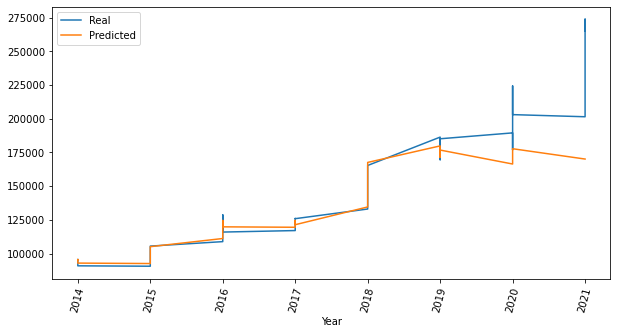

In [279]:
# Create a DataFrame of Real and Predicted values
results = pd.DataFrame({
    "Real": combined_df["Fraud Reporting Count"],
    "Predicted": predicted_output.ravel()
}, index = combined_df.index) 
results.head()
results_plot = results.plot(rot = 75,figsize=(10,5))
fig = results_plot.get_figure()
fig.savefig('Resources/Images/RannyRFOutputPlot.png',format='png')

In [280]:
from sklearn.metrics import r2_score, explained_variance_score

print(f"r2_score: {r2_score(combined_df['Fraud Reporting Count'].values, predicted_output)}" ) #1 is best
print(f"explained_variance_score: {explained_variance_score(combined_df['Fraud Reporting Count'].values, predicted_output)}") #1 is best


r2_score: 0.6367452319814639
explained_variance_score: 0.707964412330778
